# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [ ]:
class Node:
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

class Huffman:
    @staticmethod
    def code_tree(node: Node, code=''):

            if isinstance(node, str):
                return {code: node}

            left, right = node.children()
            res_dict = {}
            res_dict.update(Huffman.code_tree(left, code + '0'))
            res_dict.update(Huffman.code_tree(right, code + '1'))

            return res_dict

    @staticmethod
    def encode(text: str) -> tuple[str, dict[str: str]]:

        if not isinstance(text, str) or not text:
            return "You can encode only nonempty string"

        nodes = sorted([(x, text.count(x)) for x in list(set(text))], key=lambda x: x[1], reverse=True)

        while len(nodes) > 1:

            node1, c1 = nodes[-1]
            node2, c2 = nodes[-2]
            nodes = nodes[:-2]

            node = Node(node1, node2)
            nodes.append((node, c1 + c2))

            nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

        res_dict = Huffman.code_tree(nodes[0][0])
        d_swap = {v: k for k, v in res_dict.items()}

        for letter in d_swap:
            text = text.replace(letter, d_swap[letter])

        return text, res_dict


    def decode(code: str, coding_dict: dict[str, str]):

        res = ''
        while code:
            for i in coding_dict:
                if code.startswith(i):
                    res += coding_dict[i]
                    code = code[len(i):]

        return res

In [ ]:
text = 'Hello, World!'
a = Huffman.encode(text)
print(Huffman.decode(a[0], a[1]))

Hello, World!


# Testing Huffman

In [ ]:
import random
import string
def str_generator(num):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(num))

In [ ]:
def testing():
    for n in range(10, 20):
        n = 2 ** n
        print(">>> Testing string size:", n)
        message = str_generator(n)
        enc = Huffman.encode(message)
        assert Huffman.decode(enc[0], enc[1]) == message
        print('Success!')
testing()

>>> Testing string size: 1024
Success!
>>> Testing string size: 2048
Success!
>>> Testing string size: 4096
Success!
>>> Testing string size: 8192
Success!
>>> Testing string size: 16384
Success!
>>> Testing string size: 32768
Success!
>>> Testing string size: 65536
Success!
>>> Testing string size: 131072
Success!
>>> Testing string size: 262144
Success!
>>> Testing string size: 524288
Success!


In [ ]:
import time
import matplotlib.pyplot as plt

def huffman_plot():

    performance = []
    lengths = list(range(1, 500000, 100))

    for i in lengths:
        string = str_generator(i)
        start = time.perf_counter()
        Huffman.encode(string)
        end = time.perf_counter()

        performance.append(end-start)
    return lengths, performance

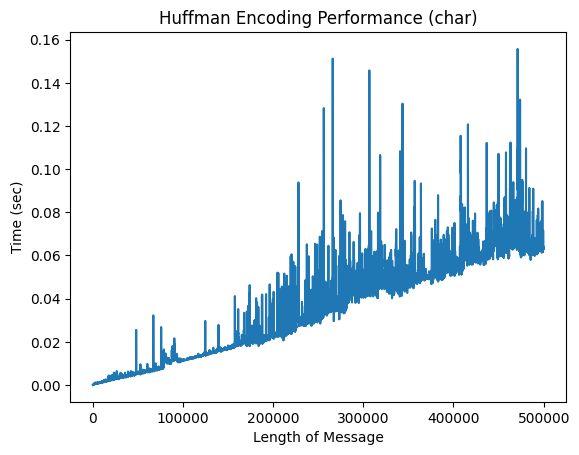

In [ ]:
x, y = huffman_plot()
plt.plot(x, y)
plt.xlabel('Length of Message')
plt.ylabel('Time (sec)')
plt.title('Huffman Encoding Performance (char)')
plt.show()

### Алгоритм Хаффмана
Алгоритм Хаффмана - це метод безвтратного стиснення даних, який базується на побудові оптимального префіксного коду для заданого алфавіту символів з використанням їх частот входження.

#### Кроки алгоритму Хаффмана:

1. **Підрахунок частоти символів**: Спочатку визначається частота кожного символу в тексті, який ми хочемо стиснути.

2. **Побудова дерева кодування**:
   - Кожен символ представляє вершину дерева.
   - Створюється список частот символів (або листків дерева), який відсортований за зростанням частоти.
   - Потім кожні дві найменші вершини зливаються в одну нову, частота якої дорівнює сумі частот дітей.
   - Ця операція повторюється, поки не залишиться тільки одна вершина, що стане коренем дерева.

3. **Присвоєння кодів символам**:
   - Під час обходу дерева вниз з кореня, лівим гілкам присвоюється біт 0, а правим - біт 1.
   - Кожен символ отримує свій унікальний бінарний код на основі його шляху від кореня до листка.

4. **Створення таблиці кодування**:
   - Створюється словник, де для кожного символу зберігається його код.

5. **Кодування тексту**:
   - Оригінальний текст замінюється його бінарним представленням, використовуючи словник кодування.

6. **Декодування тексту**:
   - За допомогою дерева кодування кожен бінарний код дешифрується у вихідний символ.

Алгоритм Хаффмана - це ефективний метод стиснення даних, особливо для текстових даних з нерівномірним розподілом символів. Він здатен досягати значного ступеня стиснення, особливо коли деякі символи зустрічаються набагато частіше за інші.
### Висновок:
Алгоритм Хаффмана ефективний для стиснення даних, особливо коли вхідні дані мають нерівномірний розподіл частот символів. Він може досягати значного стиску, особливо на текстових даних. Проте, для невеликих обсягів даних та рівномірного розподілу символів, його ефективність може бути обмеженою. У порівнянні з іншими алгоритмами стиснення.